# Implementing Statistical Distributions

# Normal distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm



Normal Distributions are the most common distributions in statistics primarily because they describe a lot of natural phenomena. Normal distributions are also known as ‘Gaussian distributions’ or ‘bell curve’, because of the bell shaped curve.

In [1]:
from scipy.stats import norm,expon,bernoulli
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate an array of 200 random sample from a normal dist with 
# mean 0 and stdv 1
random_sample = norm.rvs(loc=0,scale=1,size=200) 


In [3]:
# Distribution fitting
# norm.fit(data) returns a list of two parameters 
# (mean, parameters[0] and std, parameters[1]) via a MLE approach 
# to data, which should be in array form.
parameters = norm.fit(random_sample)


In [4]:
# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)

In [5]:
# Generate the pdf (fitted distribution)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
# Generate the pdf (normal distribution non fitted)
normal_pdf = norm.pdf(x)

In [6]:
# Type help(plot) for a ton of information on pyplot
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(random_sample,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting")
# insert a legend in the plot (using label)
plt.legend()

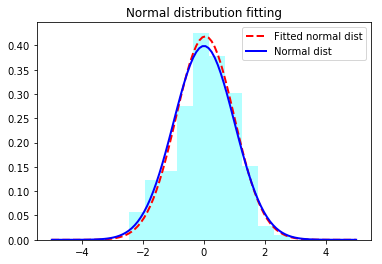

In [7]:
# we finally show our work
plt.show()

Displaying the histogram with the normal distribution and the fitted normal distribution curve with sample size of 200

In [8]:
#Check accuracy of cdf and ppf:
    
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

** Since the above value is true, our model accuracy is high **

# Exponential Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon



A continuous random variable zz is said to be exponentially distributed with rate λ>0λ>0 (written as z∼E(λ)z∼E(λ)) if its probability density function is given by

pz(z)=λe^-λz if z≥0 and pz(z)=0 if z<0


In [9]:
# Generate an array of 200 random sample from a normal dist with 
# mean 0 and stdv 1
random_sample2= expon.rvs(loc=0, scale=1, size=100)

In [10]:
# Distribution fitting
# norm.fit(data) returns a list of two parameters 
# (mean, parameters[0] and std, parameters[1]) via a MLE approach 
# to data, which should be in array form.
parameters2 = expon.fit(random_sample2, loc=0, scale=1)

In [11]:
# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-4,4,100)

In [12]:
# Generate the pdf (fitted distribution)
fitted_pdf_expon = expon.pdf(x,loc = parameters2[0],scale = parameters2[1])
# Generate the pdf (exponential distribution non fitted)
exponential_pdf = expon.pdf(x)

In [13]:
# Type help(plot) for a ton of information on pyplot
plt.plot(x,fitted_pdf_expon,"red",label="Fitted Exponential dist",linestyle="dashed", linewidth=2)
plt.plot(x,exponential_pdf,"blue",label="Exponential dist", linewidth=2)
plt.hist(random_sample,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Exponential distribution fitting")
# insert a legend in the plot (using label)
plt.legend()

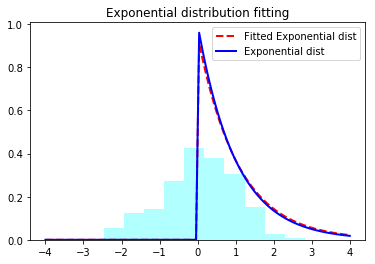

In [14]:
plt.show()

Displaying the histogram with the exponential distribution and the fitted exponential distribution curve with sample size of 100

In [15]:
#Check accuracy of cdf and ppf

vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

True

** Since the above value is true, our model accuracy is high **

# Bernoulli Distribution

https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.bernoulli.html


The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by n=0 and n=1 in which n=1 ("success") occurs with probability  p and n=0 ("failure") occurs with probability q=1-p, where 0<p<1. 

In [16]:
#bernoulli takes p as shape parameter.
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

random_sample3= bernoulli.rvs(p, loc=0, size=100)

In [17]:
#Display the probability mass function (pmf):

x = np.arange(bernoulli.ppf(0.01, p), bernoulli.ppf(0.99, p))

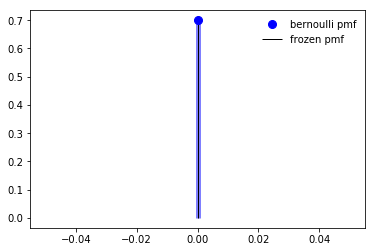

In [18]:
rv = bernoulli(p)
plt.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
plt.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
#Alternatively, the distribution object can be called (as a function) to fix the shape and location. This returns a “frozen” RV object holding the given parameters fixed.
#Freeze the distribution and display the frozen pmf:
plt.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
plt.legend(loc='best', frameon=False)
plt.show()

In [19]:
#Check the accuracy of the distribution

prob = bernoulli.cdf(x,p)

np.allclose(x, bernoulli.ppf(prob,p))

True

** Since the above value is true, our model accuracy is high **